***
### How LightFM Works?
"A hybrid latent representation recommender model.

The model learns embeddings (latent representations in a high-dimensional space) for users and items in a way that encodes user preferences over items. When multiplied together, these representations produce scores for every item for a given user; items scored highly are more likely to be interesting to the user.

The user and item representations are expressed in terms of representations of their features: an embedding is estimated for every feature, and these features are then summed together to arrive at representations for users and items. For example, if the movie ‘Wizard of Oz’ is described by the following features: ‘musical fantasy’, ‘Judy Garland’, and ‘Wizard of Oz’, then its embedding will be given by taking the features’ embeddings and adding them together. The same applies to user features.

The embeddings are learned through stochastic gradient descent methods."

**source :https://making.lyst.com/lightfm/docs/index.html*

***

### Load Data

In [63]:
#load functions, packages, data etc.
%run ./All_Functions.py

products_df = pd.read_csv("./data/Products.csv")
customers_df = pd.read_csv("./data/Customers.csv")

#get data , choose rating column
rating_column='Quantity'
leave_one_out=False
in_topn_rate='-'
train , test , rating_column = load_dill(rating_column=rating_column,load_cv=False)


### Leave One Out Test

##### removes from the train dataframe each customer's highest rated product 


In [64]:
leave_one_out=True
rating_column='Quantity'
precision='-'
recall='-'

#create trainset 
(loo_train,highest_rated_products ,rating_column)=Leave_highest_rating_out(dataframe=train)

train=loo_train


Rows before: 67107 

Rows after: 61559 



### Create Matrix Dataset

In [65]:
matrix = calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=False)

#compressed matrix 
matrix_train = calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=True)
matrix_test = calculate_sparsity(data=test,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=True)
                        
matrix_train, matrix_test                    

Sparsity: 0.97
Sparsity: 0.97
Sparsity: 0.98


(<5522x421 sparse matrix of type '<class 'numpy.float64'>'
 	with 61559 stored elements in Compressed Sparse Row format>,
 <5548x421 sparse matrix of type '<class 'numpy.float64'>'
 	with 46692 stored elements in Compressed Sparse Row format>)

In [66]:
matrix[:10]
 

ProductId,00BEC3E7-E598-E911-80CF-000D3AB18B8E,00D466F8-CD4E-EA11-A81F-000D3A497E15,014C107A-E898-E911-80CF-000D3AB18B8E,01C94D28-E498-E911-80CF-000D3AB18B8E,02BEC3E7-E598-E911-80CF-000D3AB18B8E,02D466F8-CD4E-EA11-A81F-000D3A497E15,035631AF-E498-E911-80CF-000D3AB18B8E,03B23102-BD9C-E911-80CF-000D3AB18B8E,0436347E-E498-E911-80CF-000D3AB18B8E,04D466F8-CD4E-EA11-A81F-000D3A497E15,...,FC693978-E498-E911-80CF-000D3AB18B8E,FCE44224-E798-E911-80CF-000D3AB18B8E,FD4D0E37-E598-E911-80CF-000D3AB18B8E,FE06929A-EC98-E911-80CF-000D3AB18B8E,FE162BF4-E598-E911-80CF-000D3AB18B8E,FEBDC3E7-E598-E911-80CF-000D3AB18B8E,FEDCF7C2-E898-E911-80CF-000D3AB18B8E,FEF78EB7-EB98-E911-80CF-000D3AB18B8E,FFAAAEB0-E598-E911-80CF-000D3AB18B8E,FFC84D28-E498-E911-80CF-000D3AB18B8E
CustomerId,,,,,,,,,,,,,,,,,,,,,
000CAC9C-AF57-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001C2C84-A312-EA11-A81C-000D3A497E15,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
002861E1-5721-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00459F71-952D-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004D58CE-2A38-EA11-A81E-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0061F14B-F54F-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00621410-9212-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0064A8A3-1E33-EA11-A81D-000D3A497E15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007E7FC5-5D17-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Map IDs To Integers

##### Convert customer_ids and product_ids to integers as for the model's requirements.

In [67]:
customer_dict={}
for customer in enumerate(matrix.index):
    #{'Customer_ID':'0'}
    customer_dict[customer[1]]=customer[0]
    
product_dict={}    
for product in enumerate(matrix.columns):
    #{'Product_ID':'0'}
    product_dict[product[1]]=product[0]

## Training / Hyperparameter Tunning

In [68]:
# #train the model
model=LightFM(loss='warp')
model.fit(interactions=matrix_train, epochs=30 ,num_threads=1,verbose=True)


tuning_timing='-'
tuning_score='-'
tuning_metric='-'
num_samples='-'
# hyperparams= {} 
hyperparams={'epochs': 30,'loss':'warp'}

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [69]:
# hyperparameters ranges available 

# def sample_hyperparameters():
#     """
#     Yield possible hyperparameter choices.
#     """

#     while True:
#         yield {
#             "no_components": np.random.randint(16, 64),
#             "learning_schedule": np.random.choice(["adagrad", "adadelta"]),
#             #"loss": np.random.choice(["bpr", "warp", "warp-kos"]),
#             "loss": np.random.choice(["warp-kos", "warp"]), 
#             "learning_rate": np.random.exponential(0.05),
#             "item_alpha": np.random.exponential(1e-8),
#             "user_alpha": np.random.exponential(1e-8),
#             "max_sampled": np.random.randint(5, 15),
#             "num_epochs": np.random.randint(5, 50),
#         }

In [70]:
tuning_metric='Precision'
#hyperparameter tuning
(train_auc_score, test_auc_score, train_precision, test_precision, train_recall, test_recall,
 hyperparams, model, num_samples, tuning_timing, tuning_metric )=hyperparameter_tuning(trainset=matrix_train, 
                                                                                        testset=matrix_test, tuning_metric='Precision', num_samples=12)

(train_auc_score, test_auc_score, train_precision, test_precision, train_recall, test_recall,
hyperparams, model, num_samples, tuning_timing, tuning_metric)                                                                                        

ValueError: The user feature matrix specifies more features than there are estimated feature embeddings: 5522 vs 5548.

In [ ]:
tuning_score= test_precision

## Get Recommendations

In [71]:
N=5
recommendations=topn_recommedation(train=matrix,model=model,
            customer_dict=customer_dict,product_dict=product_dict,products_df=products_df,customers_df=customers_df,N=N)
recommendations[:5]

,CustomerName,Top5,Top5_Ids
000CAC9C-AF57-EA11-A81F-000D3A497E15,Σπύρος Οικονόμου,"[FREDDO REGULAR BRAZILIAN, CAP CALDO REGULAR B...","[E3E5129F-E998-E911-80CF-000D3AB18B8E, CADC48A..."
001C2C84-A312-EA11-A81C-000D3A497E15,Μιχάλης Παρασκευόπουλος,"[ΚΟΥΛΟΥΡΙ ΣΙΚΑΛΗΣ ΘΕΣ., ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ, ...","[2710DD8C-E998-E911-80CF-000D3AB18B8E, FA5C70A..."
002861E1-5721-EA11-A81D-000D3A497E15,Δημητρα Λουστροπούλου,"[ΤΣΑΙ / TEA, ΤΟΣΤ 4 ΕΙΔΗ/3.5€ ΕΥΡΩ, ΣΤΙΓΜΙΑΙΟΣ...","[2DB23102-BD9C-E911-80CF-000D3AB18B8E, 139EFA0..."
00459F71-952D-EA11-A81D-000D3A497E15,Stylianos Voulgaridis,"[CALDO SINGLE ARABICA, CAP CALDO REGULAR ARABI...","[FE06929A-EC98-E911-80CF-000D3AB18B8E, 3BC57A9..."
004D58CE-2A38-EA11-A81E-000D3A497E15,Δημητρα Στρατη,"[FREDDO REGULAR BRAZILIAN, ESPRESSO FREDDO ARA...","[E3E5129F-E998-E911-80CF-000D3AB18B8E, 0DC57A9..."


### Look Into Recommendation Results

In [72]:
#top recommendations 
topn=count_topn_occurances(recommendations)
topn

Unique Topn: 5474


,Top5,Times_recommended,top1,top2,top3,top4,top5
0,"[CAP CALDO REGULAR BRAZILIAN, ESPR CALDO REGUL...",5,CAP CALDO REGULAR BRAZILIAN,ESPR CALDO REGULAR BRAZILIAN,ESPRESSO FREDDO BRAZILIAN,ESPRESSO FREDDO ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L"
1,"[CAP CALDO REGULAR BRAZILIAN, ESPR CALDO REGUL...",3,CAP CALDO REGULAR BRAZILIAN,ESPR CALDO REGULAR BRAZILIAN,ESPRESSO FREDDO ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",CAP CALDO REGULAR ARABICA
2,"[ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ, FREDDO REGULAR BRAZILIA...",2,ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ,FREDDO REGULAR BRAZILIAN,ESPRESSO FREDDO ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",ΤΟΣΤ 4 ΕΙΔΗ/3.5€ ΕΥΡΩ
3,"[CAP CALDO REGULAR BRAZILIAN, ESPRESSO FREDDO ...",2,CAP CALDO REGULAR BRAZILIAN,ESPRESSO FREDDO ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",FREDDO REGULAR ARABICA,ESPR CALDO REGULAR BRAZILIAN
4,"[CAP CALDO REGULAR ARABICA, ESPRESSO FREDDO BR...",2,CAP CALDO REGULAR ARABICA,ESPRESSO FREDDO BRAZILIAN,"ΑΥΡΑ ΝΕΡΟ 0,5L",ESPRESSO FREDDO ARABICA,CAP CALDO REGULAR BRAZILIAN
...,...,...,...,...,...,...,...
5469,"[CAP CALDO REGULAR BRAZILIAN, CAP CALDO REGULA...",1,CAP CALDO REGULAR BRAZILIAN,CAP CALDO REGULAR ARABICA,ΤΟΣΤ,CALDO SINGLE BRAZILIAN,ESPR CALDO REGULAR BRAZILIAN
5470,"[ΤΟΣΤ, CLUB SANDWICH ΜΕ ΠΑΤΑΤΕΣ, COCA ZERO ΚΥΤ...",1,ΤΟΣΤ,CLUB SANDWICH ΜΕ ΠΑΤΑΤΕΣ,"COCA ZERO ΚΥΤΙΟ 0,33L",ΤΟΣΤ 4 ΕΙΔΗ/3.5€ ΕΥΡΩ,MUFFIN MERENDA
5471,"[FREDDO REGULAR BRAZILIAN, CALDO SINGLE BRAZIL...",1,FREDDO REGULAR BRAZILIAN,CALDO SINGLE BRAZILIAN,ESPRESSO FREDDO BRAZILIAN,ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ,"ΑΥΡΑ ΝΕΡΟ 0,5L"
5472,"[FREDDO REGULAR BRAZILIAN, ESPRESSO FREDDO BRA...",1,FREDDO REGULAR BRAZILIAN,ESPRESSO FREDDO BRAZILIAN,ESPRESSO FREDDO ARABICA,"ΑΥΡΑ ΝΕΡΟ 0,5L",ΤΟΣΤ 4 ΕΙΔΗ/3.5€ ΕΥΡΩ


In [73]:
#unique recommendations   
unique_topNs=topn.shape[0] / train['CustomerId'].nunique() * 100
print("Unique recommendations per customer: {0}%".format(round(unique_topNs ,2)))

Unique recommendations per customer: 99.13%


In [74]:
product_popularity_in_recommendations(recommendation_df=recommendations,N=N)

Unique products in all TopN: 111 


{'ESPRESSO FREDDO ARABICA': 2570,
 'ΑΥΡΑ ΝΕΡΟ 0,5L': 2412,
 'CAP CALDO REGULAR ARABICA': 2173,
 'ESPRESSO FREDDO BRAZILIAN': 1506,
 'CAP CALDO REGULAR BRAZILIAN': 1313,
 'FREDDO REGULAR ARABICA': 1159,
 'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ': 1106,
 'ΤΟΣΤ 4 ΕΙΔΗ/3.5€ ΕΥΡΩ': 956,
 'FREDDO REGULAR BRAZILIAN': 865,
 'ΚΟΥΛΟΥΡΙ ΘΕΣΣΑΛΟΝΙΚΗΣ': 747,
 'FRAPPE REGULAR': 691,
 'ESPR CALDO REGULAR ARABICA': 661,
 'ESPR CALDO REGULAR BRAZILIAN': 635,
 'ΧΕΙΡΟΠ. ΖΑΜΠΟΝΟΤΥΡΟΠΙΤΑ': 614,
 'CALDO GRANDE ARABICA': 613,
 'ΠΙΤΣΑ ΣΚΕΠΑΣΤΗ': 549,
 'ΤΟΣΤ': 479,
 'ΧΕΙΡ.ΚΟΥΛ.ΘΕΣ/ΚΗΣ ΓΑΛΟΠΟΥΛΑ': 474,
 'ΜΠΟΥΓΑΤΣΑ ΚΩΝ/ΠΟΛΗΣ ΜΕ ΚΡΕΜΑ': 471,
 'ΤΥΡΟΠΙΤΑ PHILADELPHIA': 426,
 'ΚΟΥΛΟΥΡΙ ΣΙΚΑΛΗΣ ΘΕΣ.': 414,
 'CALDO SINGLE BRAZILIAN': 398,
 'ΦΡΕΣΚΟΣ ΧΥΜΟΣ ΠΟΡΤΟΚΑΛΙ 330 ML': 378,
 'CALDO SINGLE ARABICA': 363,
 'CALDO GRANDE BRAZILIAN': 333,
 'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR': 316,
 'ΧΩΡ. ΣΠΑΝΑΚΟΤΥΡΟΠΙΤΑ ΤΑΨΙΟΥ ΜΕ ΦΕΤΑ ΠΟΠ': 275,
 'COCA COLA ΚΥΤΙΟ 0,33L': 258,
 'ΠΟΛΥΣ. ΜΠΑΓΚ.(ΓΑΛΟΠΟΥΛΑ-ΤΥΡΙ DIROLLO)': 244,
 'ΧΩΡ. ΤΥΡΟΠΙΤΑ ΤΑΨΙΟΥ ΜΕ ΦΕΤΑ ΠΟΠ': 23

In [75]:
unique_TopN_products=len(product_popularity_in_recommendations(recommendation_df=recommendations,N=N)) / train['ProductId'].nunique() *100
print("Unique products in recommendations : {0}%".format(round(unique_TopN_products ,2)))

Unique products in all TopN: 111 
Unique products in recommendations : 26.37%


In [76]:
count_product_in_topn(product_name='ESPRESSO FREDDO ARABICA',recommendations=recommendations)

False    2952
True     2570
Name: topn_to_str, dtype: int64

## Hit Rate

In [77]:
#hit rate 
(hit_rate ,hits ,count_customers ,timing ,products_in_hits ,threshold, customer_dictionaries) = calculate_accuracy(recommend=recommendations,
                        train=train,test=test,products_df=products_df,customers_df=customers_df,threshold=1,N=N,show=False)

Time:
Accuracy:


In [78]:
(hit_rate ,hits ,count_customers ,timing ,threshold)

(0.8, 4361, 5453, 360.81398153305054, 1)

In [79]:
#preview
products_in_hits[:5]

['ESPRESSO FREDDO BRAZILIAN',
 'ΧΕΙΡΟΠ. ΖΑΜΠΟΝΟΤΥΡΟΠΙΤΑ',
 'CALDO SINGLE ARABICA',
 'CAP CALDO REGULAR ARABICA',
 'ESPR CALDO REGULAR BRAZILIAN']

In [80]:
hit_popularity_matrix(hit_products=products_in_hits)


,Product,Hits
1,ESPRESSO FREDDO ARABICA,1332
2,"ΑΥΡΑ ΝΕΡΟ 0,5L",900
3,ESPRESSO FREDDO BRAZILIAN,789
4,CAP CALDO REGULAR ARABICA,545
5,CAP CALDO REGULAR BRAZILIAN,514
...,...,...
78,ΚΡΕΜΑ ΣΟΚΟΛΑΤΑ BR REG,1
79,FREDDO REGULAR DECAF.,1
80,ESP CALDO REG(TAXI),1
81,"COCA ZERO ΚΥΤΙΟ 0,33L",1


In [81]:
#Recommendation Results for each customer
customer_dictionaries[:2]

[defaultdict(int,
             {'CustomerId': '000CAC9C-AF57-EA11-A81F-000D3A497E15',
              'CustomerName': 'Σπύρος Οικονόμου',
              'Recommendations': ['FREDDO REGULAR BRAZILIAN',
               'CAP CALDO REGULAR BRAZILIAN',
               'ESPRESSO FREDDO BRAZILIAN',
               'CAP CALDO REGULAR ARABICA',
               'ΑΥΡΑ ΝΕΡΟ 0,5L'],
              'Will_buy': ['ESPRESSO FREDDO ARABICA',
               'ΧΕΙΡΟΠ. ΑΥΘ. ΠΟΛΙΤΙΚΗ ΚΟΥΡΟΥ',
               'ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥΝ.',
               'ESPRESSO FREDDO BRAZILIAN',
               'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
               'ΧΩΡ. ΣΠΑΝΑΚΟΤΥΡΟΠΙΤΑ ΤΑΨΙΟΥ ΜΕ ΦΕΤΑ ΠΟΠ'],
              'Hits_number': 1,
              'Hits': ['ESPRESSO FREDDO BRAZILIAN'],
              'Prior_purchases': ['ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
               'ESPR CALDO REGULAR BRAZILIAN',
               'ESPRESSO FREDDO ARABICA',
               'FREDDO REGULAR ARABICA',
               'FRAPPE REGULAR',
               'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG'],
   

## Presicion & Recall

In [37]:
#calculate presicion
ptemp=precision_at_k(model, matrix_test, k=N)
precision=ptemp.mean()
#round up precision avg 
precision = round( float(precision),2)
print('P mean: {0}'.format(precision))
#precision distribution
values, count= np.unique(ptemp,return_counts=True)
dict(zip(values,count))

P mean: 0.54


{0.0: 50, 0.2: 781, 0.4: 1615, 0.6: 1795, 0.8: 1030, 1.0: 277}

In [38]:
#calculate recall
rtemp=recall_at_k(model=model,test_interactions=matrix_test, k=N, check_intersections=False)
#round up array's numbers 
rtemp=np.round(rtemp,2)
#round up avg recall
recall=rtemp.mean()
recall=round(float(recall),2)
print('R mean: {0}'.format(recall))
#recall distribution
values, count= np.unique(rtemp,return_counts=True)
dict(zip(values,count))
# plt.plot(rtemp,'r.')

R mean: 0.41


{0.0: 50,
 0.02: 1,
 0.03: 1,
 0.04: 1,
 0.05: 4,
 0.06: 15,
 0.07: 22,
 0.08: 20,
 0.09: 31,
 0.1: 39,
 0.11: 40,
 0.12: 94,
 0.13: 31,
 0.14: 108,
 0.15: 47,
 0.16: 18,
 0.17: 147,
 0.18: 98,
 0.19: 50,
 0.2: 204,
 0.21: 75,
 0.22: 129,
 0.23: 76,
 0.24: 25,
 0.25: 333,
 0.26: 10,
 0.27: 145,
 0.28: 5,
 0.29: 217,
 0.3: 103,
 0.31: 68,
 0.33: 530,
 0.36: 95,
 0.38: 204,
 0.4: 265,
 0.42: 17,
 0.43: 201,
 0.44: 99,
 0.45: 23,
 0.5: 652,
 0.56: 28,
 0.57: 126,
 0.6: 201,
 0.62: 19,
 0.67: 306,
 0.71: 16,
 0.75: 165,
 0.8: 53,
 0.83: 14,
 1.0: 327}

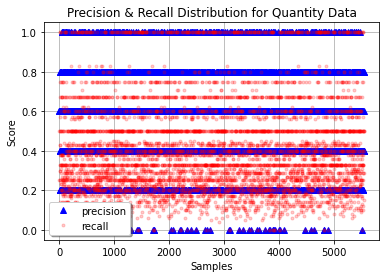

In [39]:
plt.plot(ptemp,'b^',label='precision')
plt.plot(rtemp,'r.',label='recall',alpha=0.2)
plt.legend(shadow=True)
plt.title('Precision & Recall Distribution for {0} Data'.format(rating_column))
plt.xlabel('Samples')
plt.ylabel('Score')
plt.grid()

## Update Logs

In [40]:
#update train log
train_log=training_log2(rating_column=rating_column, algo=model, tuning_time=tuning_timing, num_samples=num_samples,
                        tuning_score= tuning_score , tuning_metric='Precision', create_log=False,hyperparams=hyperparams,LOO=leave_one_out)
train_log              

,Date,Data,Algo,Tunning,Tunning_time,Tuning_Samples,Parameters,Tuning_Metric,Tuning_score,Leave_one_out
1,2021-12-09 16:28:51.768367,Quantity,LightFM,True,229.666846,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.487707,False
2,2021-12-09 16:46:35.604966,Quantity,LightFM,True,287.11,12,"{'no_components': 62, 'learning_schedule': 'ad...",Precision,0.490844,False
3,2021-12-09 16:57:48.060101,Quantity,LightFM,True,182.59,12,"{'no_components': 58, 'learning_schedule': 'ad...",Precision,0.481255,False
4,2021-12-09 17:23:57.139350,Quantity,LightFM,True,360.88,12,"{'no_components': 57, 'learning_schedule': 'ad...",Precision,0.493079,False
5,2021-12-09 20:35:25.020300,Quantity,LightFM,False,-,-,{},-,-,False
6,2021-12-09 23:30:59.326916,Quantity,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
7,2021-12-10 00:01:01.911317,Frequency1,LightFM,True,290.82,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.51,False
8,2021-12-10 00:16:31.527563,Frequency1,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
9,2021-12-10 00:35:53.070734,Frequency2,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
10,2021-12-10 01:00:08.758762,Frequency2,LightFM,True,490.19,12,"{'no_components': 54, 'learning_schedule': 'ad...",Precision,0.53,False


In [41]:
# evaluate recommendations 

preview=evaluation_log(rating_column=rating_column, algo=model, N=N, precision_avg=precision, recall_avg=recall,
                hit_rate=hit_rate,hits=hits, hit_threshold=threshold,count_customers=count_customers, time_elapsed=timing,
                unique_TopN=unique_topNs, unique_products=unique_TopN_products,loo_rate='-',leave_one_out=leave_one_out,create_log=False)

preview                

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-


## Leave One Out Evaluation 

In [82]:
train1 , test1 , rating_column = load_dill(rating_column=rating_column,load_cv=False)


In [83]:
customer=train['CustomerId'].drop_duplicates().sample(1).values[0]
df=leave_one_out_info(customer=customer,data=train1,removed_ratings=highest_rated_products,products_df=products_df,
                   customers_df=customers_df,rating_column=rating_column)
df

,index,Customer_Name,Product_Names,Quantity
0,25240,Κωνσταντίνος Παπαλεξίου,"ΑΥΡΑ ΝΕΡΟ 0,5L",2.000000
1,25241,Κωνσταντίνος Παπαλεξίου,CAP CALDO REGULAR ARABICA,24.000000
2,25242,Κωνσταντίνος Παπαλεξίου,ΠΑΡΑΔΟΣΙΑΚΟ ΠΕΙΝΕΡΛΙ,1.000000
3,25243,Κωνσταντίνος Παπαλεξίου,MUFFIN MERENDA,1.000000
4,25244,Κωνσταντίνος Παπαλεξίου,ΠΟΛΥΣ. ΜΠΑΓΚ.(ΓΑΛΟΠΟΥΛΑ-ΤΥΡΙ DIROLLO),1.000000
5,25245,Κωνσταντίνος Παπαλεξίου,ESPR CALDO SINGLE BRAZILIAN,1.000000
6,25246,Κωνσταντίνος Παπαλεξίου,CALDO SINGLE ARABICA,1.000000
7,25241,Κωνσταντίνος Παπαλεξίου,CAP CALDO REGULAR ARABICA,24.000000


In [84]:
(in_topn_rate ,in_topn  , customerid_in_topn, time_passed) =LeaveOneOut_hitrate(left_out_products=highest_rated_products,recommendations=recommendations,N=N)


(in_topn_rate , in_topn , customerid_in_topn[:2])

(0.66,
 3632,
 ['000CAC9C-AF57-EA11-A81F-000D3A497E15',
  '00459F71-952D-EA11-A81D-000D3A497E15'])

In [85]:
train_log=training_log2(rating_column=rating_column, algo=model, tuning_time=tuning_timing, num_samples=num_samples,
                        tuning_score= tuning_score , tuning_metric='Precision', create_log=False,hyperparams=hyperparams,LOO=leave_one_out)
train_log  

,Date,Data,Algo,Tunning,Tunning_time,Tuning_Samples,Parameters,Tuning_Metric,Tuning_score,Leave_one_out
1,2021-12-09 16:28:51.768367,Quantity,LightFM,True,229.666846,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.487707,False
2,2021-12-09 16:46:35.604966,Quantity,LightFM,True,287.11,12,"{'no_components': 62, 'learning_schedule': 'ad...",Precision,0.490844,False
3,2021-12-09 16:57:48.060101,Quantity,LightFM,True,182.59,12,"{'no_components': 58, 'learning_schedule': 'ad...",Precision,0.481255,False
4,2021-12-09 17:23:57.139350,Quantity,LightFM,True,360.88,12,"{'no_components': 57, 'learning_schedule': 'ad...",Precision,0.493079,False
5,2021-12-09 20:35:25.020300,Quantity,LightFM,False,-,-,{},-,-,False
6,2021-12-09 23:30:59.326916,Quantity,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
7,2021-12-10 00:01:01.911317,Frequency1,LightFM,True,290.82,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.51,False
8,2021-12-10 00:16:31.527563,Frequency1,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
9,2021-12-10 00:35:53.070734,Frequency2,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
10,2021-12-10 01:00:08.758762,Frequency2,LightFM,True,490.19,12,"{'no_components': 54, 'learning_schedule': 'ad...",Precision,0.53,False


In [86]:
preview=evaluation_log(rating_column=rating_column, algo=model, N=N, precision_avg=precision, recall_avg=recall,
                hit_rate=hit_rate,hits=hits, hit_threshold=threshold,count_customers=count_customers, time_elapsed=timing,
                unique_TopN=unique_topNs, unique_products=unique_TopN_products,loo_rate=in_topn_rate ,leave_one_out=leave_one_out,create_log=False)

preview       

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-
